In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


## Exploring Data

In [15]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


No missing valuese in the data

In [11]:
df.duplicated().sum()

0

No duplicate values present in the dataset

In [12]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

This is an imbalanced dataset as we can see 80% of the datapoints == 0

In [13]:
df['Geography'].value_counts() #a little imbalanced

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts() #balanced

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()  #dropping unnecessary coloumns 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
#One-Hot Encoding Geography and Gender cols
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

#France can be represented if both germany and spain are false (so no need to include it)
#Similarly female can be represented by just the male coloums if 0 then female.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [20]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df = df.astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [22]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [58]:
# Scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [34]:
X_train_scaled

array([[ 1.67588802, -0.94183739,  0.00934296, ...,  1.74875572,
        -0.57987798, -1.10022343],
       [ 0.30320673, -0.17987213,  1.04687659, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       [-0.10235819,  0.96307575, -0.33650158, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       ...,
       [ 0.86475817, -0.08462648, -1.37403521, ..., -0.57183516,
        -0.57987798, -1.10022343],
       [ 0.15761932,  0.39160181,  1.04687659, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [ 0.46959234,  1.15356706, -1.37403521, ...,  1.74875572,
        -0.57987798,  0.9089063 ]])

## Model Building

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-25 07:32:22.096817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753428742.324994      50 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753428742.392279      50 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [63]:
model = Sequential([
    Dense(units=8,activation='relu',input_dim=11), #Hidden layer 1 (connected to input)
    Dense(units=4,activation='relu'), #Hidden Layer 2
    Dense(units=1,activation='sigmoid'), #Output Layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
 model.compile(
     loss = 'binary_crossentropy',
     optimizer = 'adam',
     metrics = ['accuracy']
 )


In [67]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7118 - loss: 0.6696 - val_accuracy: 0.8067 - val_loss: 0.5530
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.5319 - val_accuracy: 0.8007 - val_loss: 0.4722
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 0.4785 - val_accuracy: 0.8082 - val_loss: 0.4432
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4516 - val_accuracy: 0.8119 - val_loss: 0.4287
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4477 - val_accuracy: 0.8112 - val_loss: 0.4203
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8249 - loss: 0.4165 - val_accuracy: 0.8216 - val_loss: 0.4127
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8262 - loss: 0.4125 - val_accuracy: 0.8269 - val_loss: 0.4063
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8321 - loss: 0.4134 - val_accu

In [68]:
model.layers[0].get_weights()

[array([[ 0.15812582, -0.12607026,  0.1504389 ,  0.23668936, -0.1295089 ,
         -0.46376127, -0.17156692, -0.12787072],
        [-0.8151633 ,  0.8958168 ,  0.19870064, -0.00924614,  0.8308658 ,
         -0.2073418 , -0.3205556 ,  0.19220412],
        [-0.12458591,  0.02407734,  0.04834015,  0.43193197,  0.03266993,
          0.04188546, -0.8550464 ,  0.00417386],
        [-0.10062944,  0.030532  ,  0.3970648 ,  0.04739587, -0.4498374 ,
         -0.21212082, -0.36855623,  0.2372974 ],
        [ 0.43720683,  0.6596811 ,  0.16765393,  0.05340932, -0.88415927,
          0.5587503 , -0.08510689,  1.1862459 ],
        [-0.05032396,  0.04864834,  0.09833077,  0.23163855, -0.07237902,
         -0.2179534 , -0.00593856, -0.04526729],
        [ 0.13483252,  0.6896522 , -0.4453122 ,  0.49085435, -0.08641785,
         -0.21512248, -0.5685104 ,  0.05711213],
        [ 0.11781699, -0.01063359,  0.07242961, -0.26741993, -0.01722183,
          0.10595297, -0.4962375 ,  0.01030241],
        [-0.0861

In [69]:
model.predict(X_test_scaled)

#Output is not in terms of 1 or 0 as sigmoid will give values in b/w 0 and 1
#So we convert it using a threshold value say threshold = 0.5

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04217138],
       [0.02358395],
       [0.18440351],
       ...,
       [0.07420556],
       [0.15399717],
       [0.76881754]], dtype=float32)

In [70]:
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred>0.5).astype(int)

y_pred_binary

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_pred_binary,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2829
           1       0.51      0.70      0.59       471

    accuracy                           0.86      3300
   macro avg       0.73      0.80      0.76      3300
weighted avg       0.89      0.86      0.87      3300



In [73]:
accuracy_score(y_pred_binary,y_test)

0.863030303030303

In [76]:
import matplotlib.pyplot as plt

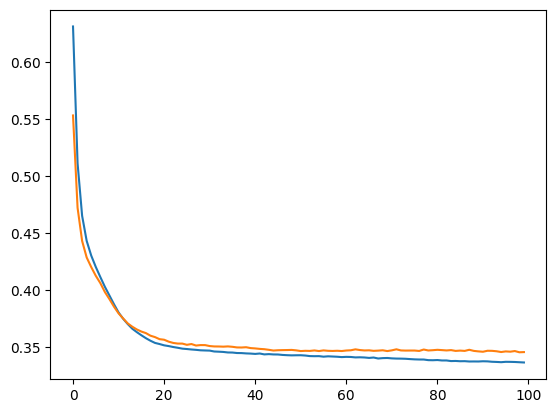

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

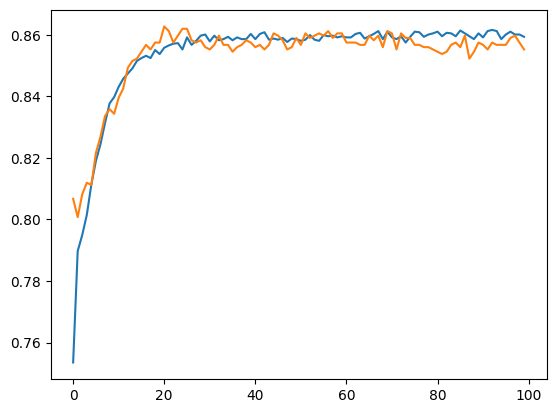

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])